In [256]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver import ActionChains
from selenium.webdriver.support.ui import WebDriverWait as Wait
from selenium.webdriver.support import expected_conditions as EC

In [2]:
import re
import requests
from time import sleep

In [3]:
from cfg import home, userAgent
from painter import drawPng, draw

In [4]:
def getDriver (ifHeadless = True):
    if not ifHeadless: return webdriver.Chrome()
    options = Options()
    options.add_argument('--headless')
    options.add_argument('user-agent="%s"' % userAgent)
    # options.binary_location = "C:/Users/ict/AppData/Local/Google/Chrome/Application/chrome.exe"
    # options.add_argument('--disable-gpu')
    # prefs = {
    #         'profile.default_content_setting_values': {
    #             'images': 2,
    #             'permissions.default.stylesheet':2,
    #             'javascript': 2
    #         }
    #     }
    # options.add_experimental_option('prefs', prefs)
    rst = webdriver.Chrome(options=options)
    rst.set_window_size(1366,850)
    return rst

In [341]:
%%time
driver = getDriver(0)

Wall time: 4 s


In [8]:
%%time
driver.get(home)
driver.current_url

Wall time: 5.7 s


'http://apps.webofknowledge.com/UA_GeneralSearch_input.do?product=UA&search_mode=GeneralSearch&SID=5CjtQcn9FZ3BWjMgCSK&preferencesSaved='

In [344]:
%%time
Wait(driver, 5).until(EC.presence_of_element_located((By.CLASS_NAME, "LymphV")))

TimeoutException: Message: 


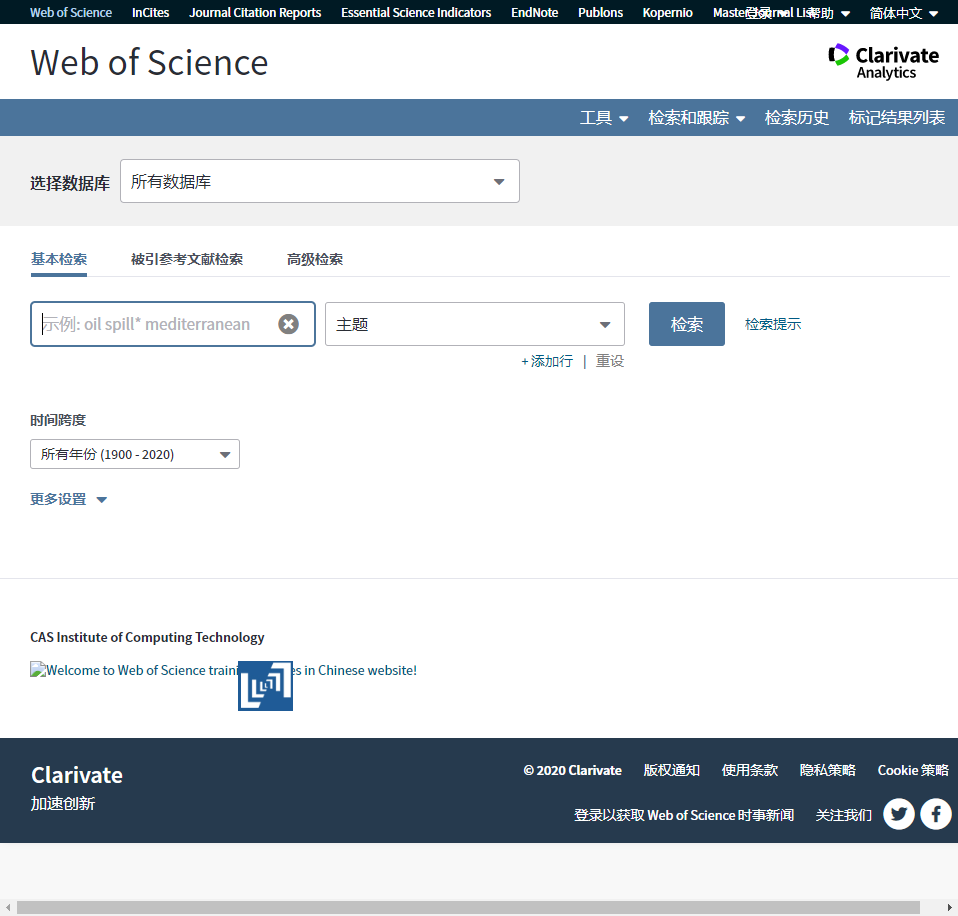

In [9]:
draw(driver)

In [328]:
driver.execute_script("databaseSelect(document.getElementById('databases')[1])")

In [29]:
driver.current_url

'http://apps.webofknowledge.com/WOS_GeneralSearch_input.do?product=WOS&SID=5CjtQcn9FZ3BWjMgCSK&search_mode=GeneralSearch'

In [30]:
keyWord = 'covid-19'

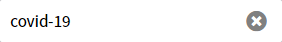

In [317]:
inp = driver.find_element_by_name('value(input1)')
drawPng(inp.screenshot_as_png)

#### 时间跨度

In [307]:
startYear = 1997
endYear = 2000

In [ ]:
//*[@class="select2 select2-container select2-container--yeardropdown select2-container--below select2-container--focus"]

In [ ]:
//*[@class="j-custom-select-yeardropdown select2-hidden-accessible"]

In [335]:
driver.find_element_by_xpath('//*[@name="range"]/following-sibling::*[1]').click()
driver.find_element_by_xpath('//*[@class="select2-results__options"]/*[1]').click()

In [336]:
driver.find_element_by_xpath('//*[@name="range"]/following-sibling::*[1]').click()
driver.find_element_by_xpath('//*[@class="select2-results__options"]/*[last()]').click()
driver.find_element_by_xpath('//*[@name="startYear"]/following-sibling::*[1]').click()
inpStartYear = driver.find_element_by_xpath('//*[@class="select2-search__field"]')
inpStartYear.clear()
inpStartYear.send_keys(str(startYear))
assert not driver.find_elements_by_xpath('//*[@aria-live="assertive"]'), 'invalid start year'
inpStartYear.send_keys(Keys.ENTER)
driver.find_element_by_xpath('//*[@name="endYear"]/following-sibling::*[1]').click()
inpStartYear = driver.find_element_by_xpath('//*[@class="select2-search__field"]')
inpStartYear.clear()
inpStartYear.send_keys(str(endYear))
assert not driver.find_elements_by_xpath('//*[@aria-live="assertive"]'), 'invalid start year'
inpStartYear.send_keys(Keys.ENTER)

In [331]:
driver.find_element_by_xpath('//*[@name="range"]/following-sibling::*[1]').click()

In [330]:
driver.find_element_by_xpath('//*[@class="select2-results__options"]/*[1]').click()

In [332]:
driver.find_element_by_xpath('//*[@class="select2-results__options"]/*[last()]').click()

In [305]:
driver.find_element_by_xpath('//*[@name="startYear"]/following-sibling::*[1]').click()

In [313]:
inpStartYear = driver.find_element_by_xpath('//*[@class="select2-search__field"]')
inpStartYear.clear()
inpStartYear.send_keys(str(startYear))
assert not driver.find_elements_by_xpath('//*[@aria-live="assertive"]'), 'invalid start year'
inpStartYear.send_keys(Keys.ENTER)

[]


In [314]:
driver.find_element_by_xpath('//*[@name="endYear"]/following-sibling::*[1]').click()

In [315]:
inpStartYear = driver.find_element_by_xpath('//*[@class="select2-search__field"]')
inpStartYear.clear()
inpStartYear.send_keys(str(endYear))
assert not driver.find_elements_by_xpath('//*[@aria-live="assertive"]'), 'invalid start year'
inpStartYear.send_keys(Keys.ENTER)

#### 键入检索关键字并检索

In [318]:
inp.clear()
inp.send_keys(keyWord)

In [319]:
%%time
inp.send_keys(Keys.ENTER)

Wall time: 4.28 s


### 高级搜索版本
### {

#### 输入关键词

In [34]:
# driver.execute_script("document.getElementsByName('value(input1)')[0].value='%s'" % keyWord)

#### 点击检索

In [35]:
# %%time
# driver.execute_script('''document.querySelectorAll('[class="standard-button primary-button"]')[1].click()''')

In [36]:
# %%time
# driver.execute_script('''document.querySelector('[class="large-button primary-button margin-left-10"]').click()''')

In [37]:
# driver.execute_script('window.scrollBy(0,300)')

In [38]:
# %%time
# driver.execute_script("document.getElementById('hitCount').click()")

### }

#### 多窗口打开

In [103]:
mainWindow = driver.current_window_handle

#### 找文章链接，不知道为什么by_class_name找不到

In [40]:
inds = driver.find_elements_by_xpath("//a[@class='smallV110 snowplow-full-record']")

In [41]:
# %%time
# driver.get(inds[0].get_attribute('href'))

In [42]:
[ind.get_attribute('href') for ind in inds]

['http://apps.webofknowledge.com/full_record.do?product=WOS&search_mode=GeneralSearch&qid=1&SID=5CjtQcn9FZ3BWjMgCSK&page=1&doc=1',
 'http://apps.webofknowledge.com/full_record.do?product=WOS&search_mode=GeneralSearch&qid=1&SID=5CjtQcn9FZ3BWjMgCSK&page=1&doc=2',
 'http://apps.webofknowledge.com/full_record.do?product=WOS&search_mode=GeneralSearch&qid=1&SID=5CjtQcn9FZ3BWjMgCSK&page=1&doc=3',
 'http://apps.webofknowledge.com/full_record.do?product=WOS&search_mode=GeneralSearch&qid=1&SID=5CjtQcn9FZ3BWjMgCSK&page=1&doc=4',
 'http://apps.webofknowledge.com/full_record.do?product=WOS&search_mode=GeneralSearch&qid=1&SID=5CjtQcn9FZ3BWjMgCSK&page=1&doc=5',
 'http://apps.webofknowledge.com/full_record.do?product=WOS&search_mode=GeneralSearch&qid=1&SID=5CjtQcn9FZ3BWjMgCSK&page=1&doc=6',
 'http://apps.webofknowledge.com/full_record.do?product=WOS&search_mode=GeneralSearch&qid=1&SID=5CjtQcn9FZ3BWjMgCSK&page=1&doc=7',
 'http://apps.webofknowledge.com/full_record.do?product=WOS&search_mode=GeneralSear

In [43]:
driver.find_element_by_xpath("//li[@class='sorttype-sub-nav_list-item  sorttype-sub-nav_list-item-active']").get_attribute('title')

'出版日期: 降序'

In [44]:
%%time
ActionChains(driver).key_down(Keys.CONTROL).click(inds[0]).key_up(Keys.CONTROL).perform()

Wall time: 330 ms


In [49]:
url = inds[0].get_attribute('href')

In [55]:
driver.find_element_by_xpath('//*[@class="sorttype-sub-nav_list-item  sorttype-sub-nav_list-item-active"]').get_attribute('title')

'出版日期: 降序'

In [57]:
its = driver.find_elements_by_xpath('//*[@class="sorttype-sub-nav_list-item"]')

In [60]:
[x.get_attribute('aria-label') for x in its]

['检索结果排序方式 被引频次: 降序',
 '检索结果排序方式 使用次数: 2013 年至今',
 '检索结果排序方式 相关性',
 '检索结果排序方式 被引频次: 降序',
 '检索结果排序方式 使用次数: 2013 年至今',
 '检索结果排序方式 相关性']

In [62]:
[x.get_attribute('aria-label') for x in driver.find_elements_by_xpath('//*[@name="sort"]')]

['检索结果排序方式 出版日期: 降序',
 '检索结果排序方式 被引频次: 降序',
 '检索结果排序方式 使用次数: 2013 年至今',
 '检索结果排序方式 相关性',
 '检索结果排序方式 出版日期: 降序',
 '检索结果排序方式 被引频次: 降序',
 '检索结果排序方式 使用次数: 2013 年至今',
 '检索结果排序方式 相关性']

In [89]:
class sortId:
    pyd = 'PY.D;LD.D;SO.A;VL.D;PG.A;AU.A' ###日期降序
    pya = 'PY.A;LD.A;SO.A;VL.A;PG.A;AU.A' ###日期升序
    lcd = 'LC.D;PY.D;AU.A.en;SO.A.en;VL.D;PG.A' ###被引频次降序
    lca = 'LC.A;PY.D;AU.A.en;SO.A.en;VL.D;PG.A' ###被引频次升序
    aca = 'ACA.D;PY.D;LD.D;SO.A;VL.D;PG.A;AU.A' ###使用次数（2013 年至今）
    rsd = 'RS.D;PY.D;AU.A;SO.A;VL.D;PG.A' ###相关性
    ldd = 'LD.D;PY.D;SO.A;VL.D;PG.A;AU.A' ###最近添加
    ac180d = 'AC180.D;PY.D;LD.D;SO.A;VL.D;PG.A;AU.A' ###使用次数（最近180天）
    aua = 'AU.A.en;PY.D;SO.A;VL.D;PG.A' ###第一作者升序
    aud = 'AU.D.en;PY.D;SO.A;VL.D;PG.A' ###第一作者降序
    soa = 'SO.A;PY.D;VL.D;AU.A;PG.A' ###来源出版物标题升序
    sod = 'SO.D;PY.D;VL.D;AU.A;PG.A' ###来源出版物标题降序
    cfa = 'CF.A;PY.D;AU.A;SO.A;VL.D;PG.A' ###会议名称升序
    cfd = 'CF.D;PY.D;AU.A;SO.A;VL.D;PG.A' ###会议名称降序

In [339]:
sid = driver.execute_script('return SID')
qid = driver.execute_script('return qid.value')

JavascriptException: Message: javascript error: qid is not defined
  (Session info: chrome=85.0.4183.83)


In [87]:
def getSortJs (sid, qid, id):
    js = '''
        trackSnowplowEventSE('sort-sort-method-top-click', '%s');
        handle_sort(undefined, 1, 
        'http://apps.webofknowledge.com/summary.do?product=WOS&parentProduct=WOS&search_mode=GeneralSearch&qid=%s&SID=%s&&page=',
        '1', 'sort', '%s' , '1');
    '''
    return js % (id, qid, sid, id)

In [252]:
def newLabel (url = ''):
    driver.execute_script('window.open("%s")' % url)

In [ ]:
lst = '%ssummary.do?product=WOS&parentProduct=WOS'

In [127]:
driver.execute_script(getSortJs(sid,qid,sortId.pya))

In [104]:
newLabelPage()

In [77]:
lnk = url

In [ ]:
# lnk = ind.get_attribute('href')

In [243]:
def getPattern (lnk):
    rst = lnk.replace('%', '%%')
    rst = re.sub(r'page=\d+', 'page=%d', rst)
    return re.sub(r'doc=\d+', 'doc=%d', rst)

In [244]:
def getLnk (doc, pat):
    return pat % ((doc - 1) // 10 + 1, doc)

In [287]:
nRst = int(driver.find_element_by_xpath('//h3[@class="title4"]/*').text.replace(',',''))

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//h3[@class="title4"]/*"}
  (Session info: chrome=85.0.4183.83)


In [204]:
import math

In [205]:
min(math.inf, 10)

10

In [254]:
def switchLabel (n):
    driver.switch_to.window(driver.window_handles[n])

In [265]:
getLnk(1,pat)

'http://apps.webofknowledge.com/full_record.do?product=WOS&search_mode=GeneralSearch&qid=1&SID=5CjtQcn9FZ3BWjMgCSK&page=1&doc=1'

In [277]:
%%time
lnks = driver.find_elements_by_xpath("//a[@class='smallV110 snowplow-full-record']")

maxDoc = 100000
need = 5
pat = getPattern(lnks[0].get_attribute('href'))
for doc in range(1,1+min(need, nRst, maxDoc)):
    newLabel(getLnk(doc,pat))
    switchLabel(-1)
    Wait(driver, 60).until(EC.presence_of_element_located((By.CLASS_NAME, "title")))
    print ('page open completed')
    #sleep(0.5)
    rst = extractValues(driver)
    print(doc)
    print(rst.title)
    print(rst.authors)
    print(rst.cauthors)
    print(rst.email)
    print('*******')
    driver.close()
    switchLabel(0)

page open completed
1
Implications of COVID-19 control measures for diet and physical activity, and lessons for addressing other pandemics facing rapidly urbanising countries
Oni, T (Oni, Tolu) ; Micklesfield, LK (Micklesfield, Lisa K.) ; Wadende, P (Wadende, Pamela) ; Obonyo, CO (Obonyo, Charles O.) ; Woodcock, J (Woodcock, James) ; Mogo, ERI (Mogo, Ebele R. I.) ; Odunitan-Wayas, FA (Odunitan-Wayas, Feyisayo A.) ; Assah, F (Assah, Felix) ; Tatah, L (Tatah, Lambed) ; Foley, L (Foley, Louise) 
Oni, T
tolullah.oni@mrc-epid.cam.ac.uk
*******
page open completed
2
Strengthening resistance to the COVID-19 pandemic and fostering future resilience requires concerted action on obesity
Jackson-Morris, AM (Jackson-Morris, Angela M.) ; Nugent, R (Nugent, Rachel) ; Ralston, J (Ralston, Johanna) ; Cavalcante, OB (Barata Cavalcante, Olivia) ; Wilding, J (Wilding, John)
Jackson-Morris, AM
ajackson-morris@gmail.com
*******
page open completed
3
A twin disaster: Addressing the COVID-19 pandemic and a c

In [129]:
newLabelPage(lnk)

In [250]:
mainWindow == driver.current_window_handle

True

In [108]:
# driver.get(lnk)

In [269]:
driver.switch_to.window(driver.window_handles[0])

In [114]:
mainWindow

'CDwindow-5D0BD937670781E0F1A5E130C19BABD4'

In [121]:
driver.close()

In [137]:
driver.find_element_by_class_name('title').text

'COVID-19 PANDEMIC'

In [166]:
cleanAuthor(driver.find_element_by_xpath(
    "//div[@class='block-record-info']/p[@class='FR_field']").text)

'Oni, T (Oni, Tolu) ; Micklesfield, LK (Micklesfield, Lisa K.) ; Wadende, P (Wadende, Pamela) ; Obonyo, CO (Obonyo, Charles O.) ; Woodcock, J (Woodcock, James) ; Mogo, ERI (Mogo, Ebele R. I.) ; Odunitan-Wayas, FA (Odunitan-Wayas, Feyisayo A.) ; Assah, F (Assah, Felix) ; Tatah, L (Tatah, Lambed) ; Foley, L (Foley, Louise) ; Mapa-Tassou, C (Mapa-Tassou, Clarisse) ; Bhagtani, D (Bhagtani, Divya) ; Weimann, A (Weimann, Amy) ; Mba, C (Mba, Camille) ; Unwin, N (Unwin, Nigel) ; Brugulat-Panes, A (Brugulat-Panes, Anna) ; Hofman, KJ (Hofman, Karen J.) ; Smith, J (Smith, Joanne) ; Tulloch-Reid, M (Tulloch-Reid, Marshall) ; Erzse, A (Erzse, Agnes) ; Shung-King, M (Shung-King, Maylene) ; Lambert, EV (Lambert, Estelle V.) ; Wareham, NJ (Wareham, Nicholas J.) '

In [165]:
def cleanAuthor (txt):
    rst = re.sub(r'^.*?[:：]', '', txt)
    rst = re.sub(r'\[[\s\d,]*?\]', '', rst)
    return re.sub(r'\.\.\..*?$', '', rst)

In [192]:
re.findall('r>(.*)\(corresponding author\)\s*<', driver.page_source)

[]

In [ ]:
driver.find_element_by_tag_name('body').get_attribute

In [208]:
re.findall(r'[:：]\s*(.*)\s\(corresponding author\)', driver.find_element_by_xpath('//a[@class="snowplow-author-email-addresses"]/../..').text)

['Oni, T']

In [174]:
driver.find_element_by_xpath('//a[@class="snowplow-author-email-addresses"]').text

'tolullah.oni@mrc-epid.cam.ac.uk'

In [241]:
def extractValues (dv):
    def rst(): pass
    
    moreAuthor = dv.find_elements_by_name('show_more_authors_authors_txt_label')
    if moreAuthor and moreAuthor[0].get_attribute('style') == 'display: inline;': 
        print(moreAuthor[0].get_attribute('style'))
        moreAuthor[0].click()
    
    title = dv.find_elements_by_class_name('title')
    authors = dv.find_elements_by_xpath('//div[@class="block-record-info"]/p[@class="FR_field"]')
    cauthors = driver.find_elements_by_xpath('//a[@class="snowplow-author-email-addresses"]/../..')
    email = dv.find_elements_by_xpath('//a[@class="snowplow-author-email-addresses"]')
    
    if not email: return None
    
    caReg = r'[:：]\s*(.*)\s\(corresponding author\)'
    
    rst.title = '' if not title else title[0].text
    rst.authors = '' if not authors else cleanAuthor(authors[0].text)
    rst.cauthors = '' if not cauthors else ';'.join(set(re.findall(caReg, cauthors[0].text)))
    rst.email = email[0].text
    return rst

In [242]:
extractValues(driver).__dict__

{'title': 'Implications of COVID-19 control measures for diet and physical activity, and lessons for addressing other pandemics facing rapidly urbanising countries',
 'authors': 'Oni, T (Oni, Tolu) ; Micklesfield, LK (Micklesfield, Lisa K.) ; Wadende, P (Wadende, Pamela) ; Obonyo, CO (Obonyo, Charles O.) ; Woodcock, J (Woodcock, James) ; Mogo, ERI (Mogo, Ebele R. I.) ; Odunitan-Wayas, FA (Odunitan-Wayas, Feyisayo A.) ; Assah, F (Assah, Felix) ; Tatah, L (Tatah, Lambed) ; Foley, L (Foley, Louise) ; Mapa-Tassou, C (Mapa-Tassou, Clarisse) ; Bhagtani, D (Bhagtani, Divya) ; Weimann, A (Weimann, Amy) ; Mba, C (Mba, Camille) ; Unwin, N (Unwin, Nigel) ; Brugulat-Panes, A (Brugulat-Panes, Anna) ; Hofman, KJ (Hofman, Karen J.) ; Smith, J (Smith, Joanne) ; Tulloch-Reid, M (Tulloch-Reid, Marshall) ; Erzse, A (Erzse, Agnes) ; Shung-King, M (Shung-King, Maylene) ; Lambert, EV (Lambert, Estelle V.) ; Wareham, NJ (Wareham, Nicholas J.) ',
 'coauthors': 'Oni, T',
 'email': 'tolullah.oni@mrc-epid.cam.ac

In [225]:
def f():pass

In [226]:
f.__str__ = lambda x:'hh'

In [228]:
str(f)

'<function f at 0x000002815F0B1550>'

'<__main__.A object at 0x000002815DCCD100>'

In [345]:
driver.quit()